In [4]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as mlt


(238, 238)


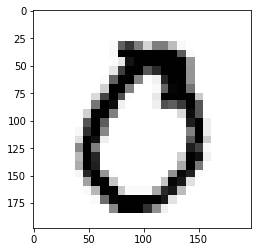

In [50]:
img_path = '.\\Desktop\\zero.png'
image = cv2.imread(img_path,0)
print(image.shape)
# image = np.reshape(a, (-1, 28)).astype(np.uint8)
image = image[20:218,20:218]
# mlt.imshow(image, cmap='Greys')
mlt.imshow(image, cmap='Greys')

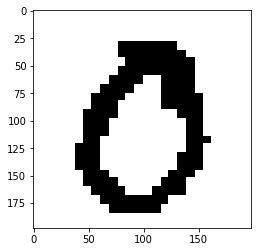

In [51]:
ret,img = cv2.threshold(image,60,255,cv2.THRESH_BINARY)
mlt.imshow(img, cmap = 'Greys')

In [62]:
for i, row in enumerate(img):
    for j, value in enumerate(row):
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
        else:
            continue
        break

(28, 77) 255
(29, 77) 255
(30, 77) 255
(31, 77) 255
(32, 77) 255
(33, 77) 255
(34, 77) 255
(35, 77) 255
(36, 77) 255
(37, 77) 255
(38, 77) 255
(39, 77) 255
(40, 77) 255
(41, 77) 255
(42, 77) 255
(43, 84) 255
(44, 84) 255
(45, 84) 255
(46, 84) 255
(47, 84) 255
(48, 84) 255
(49, 84) 255
(50, 84) 255
(51, 77) 255
(52, 77) 255
(53, 77) 255
(54, 77) 255
(55, 77) 255
(56, 77) 255
(57, 77) 255
(58, 77) 255
(59, 69) 255
(60, 69) 255
(61, 69) 255
(62, 69) 255
(63, 69) 255
(64, 69) 255
(65, 69) 255
(66, 69) 255
(67, 61) 255
(68, 61) 255
(69, 61) 255
(70, 61) 255
(71, 61) 255
(72, 61) 255
(73, 61) 255
(74, 61) 255
(75, 53) 255
(76, 53) 255
(77, 53) 255
(78, 53) 255
(79, 53) 255
(80, 53) 255
(81, 53) 255
(82, 53) 255
(83, 53) 255
(84, 53) 255
(85, 53) 255
(86, 53) 255
(87, 53) 255
(88, 53) 255
(89, 53) 255
(90, 45) 255
(91, 45) 255
(92, 45) 255
(93, 45) 255
(94, 45) 255
(95, 45) 255
(96, 45) 255
(97, 45) 255
(98, 45) 255
(99, 45) 255
(100, 45) 255
(101, 45) 255
(102, 45) 255
(103, 45) 255
(104, 45

In [53]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))

change_j =   [-1,  0,  1, # x or columns
              -1,      1,
              -1,  0,  1]

change_i =   [-1, -1, -1, # y or rows
               0,      0,
               1,  1,  1]

border = []
chain = []
curr_point = start_point
for direction in directions:
    idx = dir2idx[direction]
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while curr_point != start_point:
    #figure direction to start search
    b_direction = (direction + 5) % 8 
    dirs_1 = range(b_direction, 8)
    dirs_2 = range(0, b_direction)
    dirs = []
    dirs.extend(dirs_1)
    dirs.extend(dirs_2)
    for direction in dirs:
        idx = dir2idx[direction]
        new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
        if image[new_point] != 0: # if is ROI
            border.append(new_point)
            chain.append(direction)
            curr_point = new_point
            break
    if count == 1000: break
    count += 1

In [54]:
print(count)
print(chain)

540
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 0, 7,

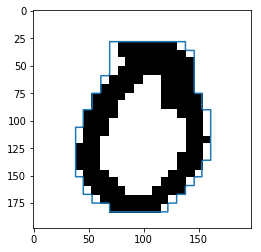

In [56]:
mlt.imshow(img, cmap='Greys')
mlt.plot([i[1] for i in border], [i[0] for i in border])

In [60]:
a = [(20,218),(20,218)]
a[0][1]

218